## TIMIT Tested on Data Convolved with different MIRs

### Convolve

In [1]:
import librosa
import scipy.signal
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import soundfile as sf
import os

In [2]:
def draw_spec(*param, name=None, save=None, a=6, b=5, show=True, bar=False, retn=False, mag=False, ws=0.1):
    # ------------------dft parameters---------------------
    FFT=16000
    HOP=160
    WIN=512
    FS=16000
    DT=2
    # --------------------- color --------------------------
    COLOR="coolwarm"
    # ---------------- loop to draw ------------------------
    n = len(param)
    if n > 1:
        fig, axs = plt.subplots(1, n, sharey=True, figsize=(a, b))
        images = []
        for col, signal in enumerate(param):
            ax = axs[col]
            if np.ndim(param[col]) == 2:
                Mag_signal_db = signal
            else:
                S_signal = librosa.stft(signal, n_fft=FFT, hop_length=HOP, win_length=WIN)  # D x T
                Mag_signal = np.abs(S_signal)
                Mag_signal_db = librosa.amplitude_to_db(Mag_signal)
            if show:
                Y = np.arange(0,np.shape(Mag_signal_db)[0],1)
                X = np.arange(0,np.shape(Mag_signal_db)[1]/FS,1/FS)

                pcm = ax.pcolormesh(X, Y, Mag_signal_db, shading='auto', cmap="coolwarm")

                ax.set_xlim([0,np.shape(Mag_signal_db)[1]/FS])
                images.append(pcm)
                ax.label_outer()
                ax.set_ylim([1, int(FFT / 2 + 1)])
                ax.set_xlabel('Time (s)')
                ax.grid(False)
                if name:
                    ax.set_title("{}".format(name[col]))
                if col == 0:
                    ax.set_ylabel('Frequency (Hz)')

        # Find the min and max of all colors for use in setting the color scale.
        if bar:
            vmin = min(image.get_array().min() for image in images)
            vmax = max(image.get_array().max() for image in images)
            norm = colors.Normalize(vmin=vmin, vmax=vmax)
            for im in images:
                im.set_norm(norm)
            fig.colorbar(images[0], ax=axs, orientation='vertical', fraction=.05, label='Magnitude(dB)')

    else:
        plt.figure(figsize=(a, b))

        if np.ndim(param[0]) == 2:
            Mag_signal_db = param[0]
        else:
            S_signal = librosa.stft(param[0], n_fft=FFT, hop_length=HOP, win_length=WIN)  # D x T
            Mag_signal = np.abs(S_signal)
            Mag_signal_db = librosa.amplitude_to_db(Mag_signal)
        if show:
            Y = np.arange(0,np.shape(Mag_signal_db)[0],1)
            X = np.arange(0,np.shape(Mag_signal_db)[1]/FS,1/FS)
            
            if mag:
                NC = 5
                NR = 1
                fig, axs = plt.subplots(ncols=NC, nrows=NR)
                fig.subplots_adjust(wspace=ws)
                gs = axs[0].get_gridspec()
                for ax in axs[0:NC-1]:
                    ax.remove()
                ax1 = fig.add_subplot(gs[0:NC-1])
                ax1.pcolormesh(X, Y, Mag_signal_db, shading='auto', cmap="coolwarm")
                ax1.set_ylim([1, int(FFT / 2 + 1)])
                ax1.set_xlabel('Time (s)')
                ax1.grid(False)
                ax2 = axs[-1]
                ax2.axes.yaxis.set_ticklabels([])
                mag_sum = (np.sum(Mag_signal_db,axis=1))/10000
                mag_sum = mag_sum - min(mag_sum)
                ax2.plot(mag_sum,Y*FS)
                ax2.set_xlabel('magnitude')
            else:
                pcm = plt.pcolormesh(X, Y, Mag_signal_db, shading='auto', cmap="coolwarm")

                #plt.xlim([0, np.shape(Mag_signal_db)[1] / FS])

                if name:
                    plt.title("{}".format(name[0]))
                plt.ylim([0, int(FFT / 2 + 1)])
                plt.xlabel('Time (s)')
                plt.ylabel('Frequency (Hz)')
                plt.grid(False)
            if bar:
                plt.colorbar(pcm, label='Magnitude(dB)')
        if save:
            plt.savefig('{}.png'.format(save), dpi=600, bbox_inches="tight")
            plt.show()
    if retn:
        return Mag_signal_db

In [3]:
def find_list(name):
    file_list = list()
    with open(name) as f:
        for line in f:
            try:
                file_list.append(line.strip())
            except EOFError:
                print('WARNING: Error reading file:', line.strip())
    return file_list

In [4]:
corpus_path = r"D:\Audio-Kuleshov\data\Corpus"

mir_name = corpus_path+"\\mir20-files.txt"
mir_file_list = find_list(mir_name)

timit_name = corpus_path+"\\timit-test-files.txt"
timit_file_list = find_list(timit_name)

In [5]:
def check_dir(path):
    if os.path.exists(path) is False:
        os.makedirs(path)

In [6]:
for i,mir in enumerate(mir_file_list):
    for test in timit_file_list:
        mir_path = corpus_path+mir
        origin_path = corpus_path+test
        out_path = corpus_path+test.replace("TIMIT", "TIMIT_test_on_MIR\\MIR{}".format(i))
        Origin, fs = librosa.load(origin_path, sr=16000)
        MIR, fs = librosa.load(mir_path, sr=16000)
        result = scipy.signal.convolve(Origin, MIR)
        check_dir(os.path.abspath(os.path.dirname(out_path)))
        sf.write(out_path, result, 16000)

<Figure size 432x360 with 0 Axes>

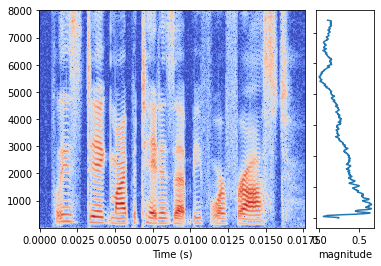

In [7]:
draw_spec(Origin,mag=True,ws=0.2)

<Figure size 432x360 with 0 Axes>

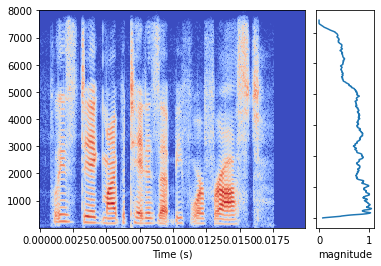

In [8]:
draw_spec(result,mag=True,ws=0.2)